INSTALL LIBRARY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**MENAMPILKAN DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#upload file
from google.colab import files
uploaded = files.upload()

Saving dataset_kendaraanlistrik.csv to dataset_kendaraanlistrik.csv


In [ ]:
import chardet
import pandas as pd

# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Specify your file path
file_path = '/content/dataset_kendaraanlistrik.csv'

# Detect encoding
detected_encoding = detect_encoding(file_path)

# Open the file with the detected encoding and handle errors
with open(file_path, 'r', encoding=detected_encoding, errors='replace') as f:
    # Read the file into a DataFrame
    data = pd.read_csv(f)

# Display the first 5 rows of the DataFrame
data.head(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat Oct 14 17:59:10 +0000 2023,1.713253e+18,@KompasTV Memang sudah waktunya beralih ke Ken...,0,0,0,0,in,1.387660e+08,1.713124e+18,RoykeLantu,https://twitter.com/RoykeLantu/status/17132531...
1,Sat Oct 14 15:36:24 +0000 2023,1.713217e+18,PLN: Lima SPKLU siap layani pengguna kendaraan...,0,0,0,0,in,3.056573e+08,1.713217e+18,ilhamiasnawi,https://twitter.com/ilhamiasnawi/status/171321...
2,Sat Oct 14 12:57:21 +0000 2023,1.713177e+18,Dengan beralih ke kendaraan listrik masyarakat...,0,0,0,0,in,1.713865e+08,1.713177e+18,plndisjatim,https://twitter.com/plndisjatim/status/1713177...
3,Sat Oct 14 12:57:20 +0000 2023,1.713177e+18,PT PLN (Persero) ajak masyarakat merubah kebia...,0,1,0,0,in,1.713865e+08,1.713177e+18,plndisjatim,https://twitter.com/plndisjatim/status/1713177...
4,Sat Oct 14 12:53:03 +0000 2023,1.713176e+18,PLN: Lima SPKLU siap layani pengguna kendaraan...,0,0,0,0,in,1.203876e+18,1.713176e+18,antarabiz,https://twitter.com/antarabiz/status/171317608...


**PREPROCESSING**

In [ ]:
# Menghapus kolom
data.drop(columns=['id_str', 'reply_count', 'retweet_count', 'quote_count', 'conversation_id_str', 'favorite_count', 'lang','user_id_str', 'tweet_url'], inplace=True)
data.head(5)

,created_at,full_text,username
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  3043 non-null   object
 1   full_text   3043 non-null   object
 2   username    3043 non-null   object
dtypes: object(3)
memory usage: 71.4+ KB


In [ ]:
# menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', data.isnull().sum())

Jumlah missing values disetiap kolom:
 created_at    0
full_text     0
username      0
dtype: int64


In [ ]:
#menambahkan kolom komentar dari kolom full_text
data['Komentar'] = data['full_text']

In [ ]:
data.head(5)

,created_at,full_text,username,Komentar
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...


**CASE FOLDING**

In [ ]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

data['clean_review'] = data['Komentar'].apply(lambda low:lowercase(str(low)))

In [ ]:
data.head()

,created_at,full_text,username,Komentar,clean_review
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,@kompastv memang sudah waktunya beralih ke ken...
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...


In [ ]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

data['clean_review'] = data['clean_review'].apply(lambda emoji: remove_emoji(emoji))
data.head()

,created_at,full_text,username,Komentar,clean_review
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,@kompastv memang sudah waktunya beralih ke ken...
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...


In [ ]:
# Fungsi untuk menghapus username
def remove_usernames(tweet):
    return ' '.join(word for word in tweet.split() if not word.startswith('@'))

data['clean_review'] = data['clean_review'].apply(lambda word: remove_usernames(word))

In [ ]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

data['clean_review'] = data['clean_review'].apply(lambda word: word_repetition(word))

In [ ]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

data['clean_review'] = data['clean_review'].apply(lambda word: repetition(word))

In [ ]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

data['clean_review'] = data['clean_review'].apply(
    lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

In [ ]:
data.head()

,created_at,full_text,username,Komentar,clean_review
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...


**NORMALISASI TEKS**

In [ ]:
slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [ ]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [ ]:
normalisasi_teks = []
for review in data['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  normalisasi_teks.append(' '.join(wordlist))

In [ ]:
normalisasi_teks

['memang sudah waktunya beralih ke kendaraan listrik supaya tidak ada lagi yang beli minyak dari negara arab',
 'pln lima spklu siap layani pengguna kendaraan listrik di sumbar https t.co/jxusxb5cjf',
 'dengan beralih ke kendaraan listrik masyarakat berkontribusi mengurangi emisi karbon sebesar 57,5 pln juga telah menyediakan fasilitas pendukung charging station yang memadai dan terjangkau plndisjatim',
 'perseroan terbatas pln persero ajak masyarakat merubah kebiasaan dengan beralih menggunakan kendaraan listrik hal ini disampaikan langsung pada seminar nasional implementasi program kendaraan listrik dan green energy dalam mendukung pelayanan publik rabu 11/10 unleashingenergyandbeyond https t.co/2rontv26x4',
 'pln lima spklu siap layani pengguna kendaraan listrik di sumbar https t.co/lk0ihetzes',
 'mungkin jadi broker kendaraan listrik untuk pejabat dan karyawan daerah khusus ibukota itu plusnya pak',
 'inilah mengapa saya masih skeptis dengan kendaraan listrik sudah benar pakai bens

In [ ]:
data['normalization'] = normalisasi_teks
data.head()

,created_at,full_text,username,Komentar,clean_review,normalization
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...


**TOKENIZING**

In [ ]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [ ]:
data['final_text'] = data['normalization'].apply(lambda remove: remove_small_words(str(remove)))

In [ ]:
def word_token(review_text):
  return word_tokenize(review_text)

In [ ]:
#Tokenizing
data['token'] = data['final_text'].apply(lambda tokenize:word_token(str(tokenize)))
data.head()

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"[memang, sudah, waktunya, beralih, kendaraan, ..."
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa..."
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"[dengan, beralih, kendaraan, listrik, masyarak..."
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"[perseroan, terbatas, persero, ajak, masyaraka..."
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa..."


In [ ]:
review_all = []

for review in data['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Streaming output truncated to the last 5000 lines.
daya
kendaraan
listrik
terdekat
pakaimolis
plnmobile
mudiklebaran
ramadhan
motorcycle
motor
motorlistrik
mobillistrik
berita
viral
https
./akg1piqwcf
bentuk
kerja
sama
seperti
konsep
mesin
bersama
apapun
molis
baterai
dari
tentunya
siap
mendukung
baik
infrastruktur
maupun
keandalan
listriknya
pakaimolis
motorlistrik
unleashingenergyandbeyond
plnuntukindonesia
aseanindonesia2023
bumnuntukasean
siapkan
peluncuran
motor
listrik
pada
semester
2023
pilihan
baterai
motorlistrik
https
./qfpzk9qva2
bulan
ramadhan
mari
kejar
yang
terbaik
dalam
ibadah
soal
harga
tidak
perlu
dipikirkan
karena
sudah
pakai
treeletrik
segera
dapatkan
unitnya
guys
informasi
lebih
lanjut
menghubungi
0855
treeletrik
treeletrikindonesia
motorlistrik
electricbike
otomotif
https
./tw5njs5pst
sobat
begitu
paling
sering
pakai
motor
listrik
sepeda
listrik
greentech
motorlistrik
sepedalistrik
https
./sg5b9btras
motor
bensin
motor
listrik
nahh
kalian
harus
tahu
beberapa
perbed

In [ ]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire sayurbox's review")
freq_dist

how many frequency distribution samples from an entire sayurbox's review


FreqDist({'https': 3044, 'listrik': 2734, 'mobillistrik': 2007, 'motor': 1621, 'motorlistrik': 1569, 'mobil': 1166, 'kendaraan': 1103, 'yang': 889, 'otomotif': 850, 'untuk': 741, ...})

In [ ]:
# menampilkan 100 kata yang paling sering muncul

common_review = freq_dist.most_common(100)
print(common_review)

[('https', 3044), ('listrik', 2734), ('mobillistrik', 2007), ('motor', 1621), ('motorlistrik', 1569), ('mobil', 1166), ('kendaraan', 1103), ('yang', 889), ('otomotif', 850), ('untuk', 741), ('pakaimolis', 707), ('electricvehicle', 701), ('motorcycle', 685), ('viral', 662), ('berita', 640), ('plnmobile', 575), ('indonesia', 492), ('dengan', 431), ('dari', 332), ('lebih', 329), ('bisa', 310), ('pemerintah', 304), ('tidak', 301), ('subsidi', 283), ('2023', 265), ('akan', 260), ('sudah', 248), ('lingkungan', 207), ('molis', 201), ('baterai', 192), ('dalam', 188), ('kendaraanlistrik', 188), ('juga', 180), ('spklu', 178), ('pada', 176), ('beli', 172), ('banyak', 170), ('masyarakat', 169), ('kita', 168), ('pakaimolisyuk', 164), ('jadi', 151), ('ramah', 150), ('pakai', 149), ('emisi', 145), ('beralih', 143), ('juta', 138), ('menjadi', 129), ('selengkapnya', 124), ('siap', 123), ('arsjadrasjid', 123), ('inklusifkolaboratif', 119), ('buat', 118), ('pengguna', 117), ('tahun', 115), ('melalui', 11

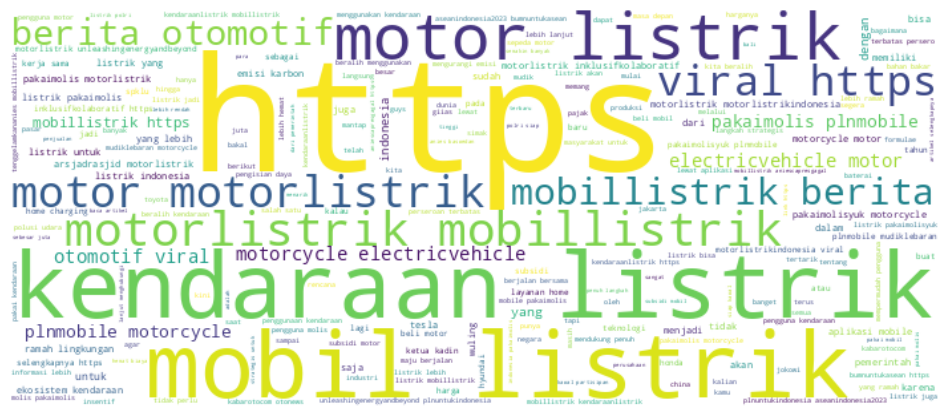

In [ ]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
data.head()

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"[memang, sudah, waktunya, beralih, kendaraan, ..."
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa..."
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"[dengan, beralih, kendaraan, listrik, masyarak..."
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"[perseroan, terbatas, persero, ajak, masyaraka..."
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa..."


In [ ]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,https,3044
1,listrik,2734
2,mobillistrik,2007
3,motor,1621
4,motorlistrik,1569
...,...,...
95,baca,82
96,atau,81
97,penggunaan,81
98,baik,80


In [ ]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

<ipython-input-36-27fd7d185640>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')


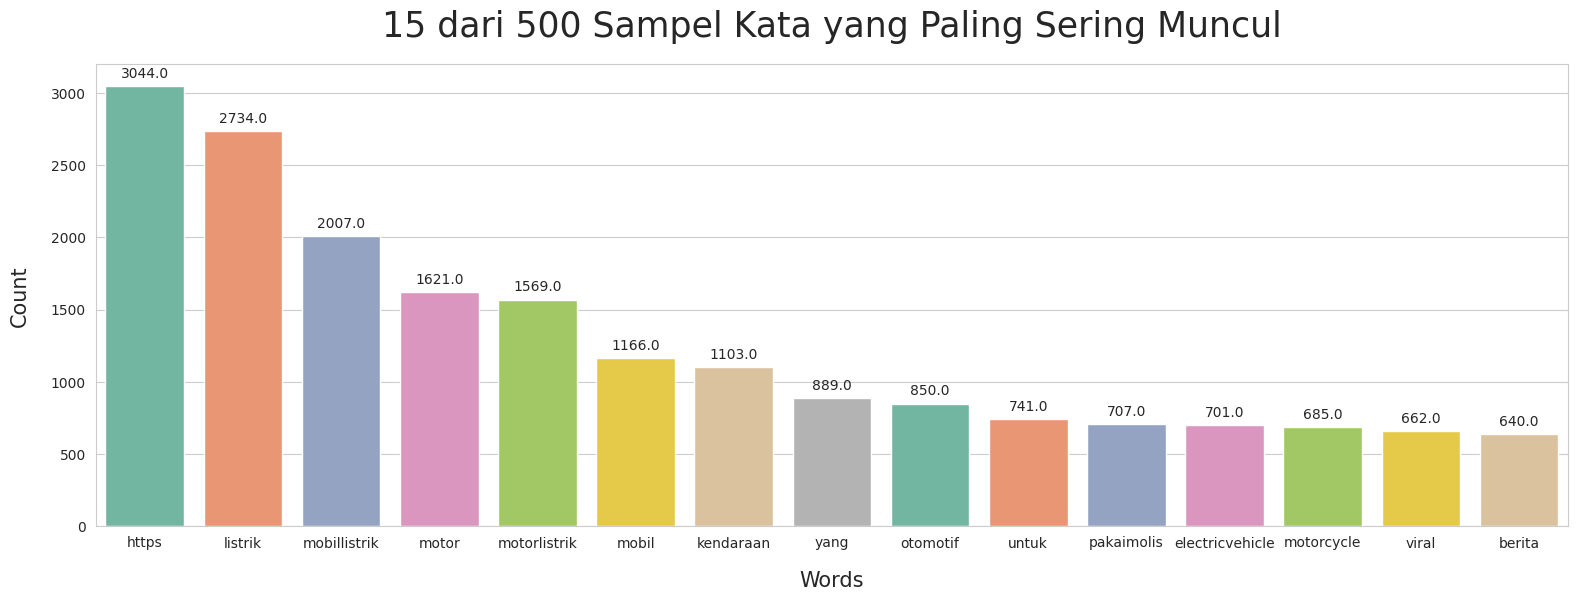

In [ ]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(19,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

**STOPWORDS**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [ ]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [ ]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [ ]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

data['stop_review'] =data['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))
data.head()

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"[memang, sudah, waktunya, beralih, kendaraan, ...","[beralih, kendaraan, listrik, beli, minyak, ne..."
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ..."
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"[dengan, beralih, kendaraan, listrik, masyarak...","[beralih, kendaraan, listrik, masyarakat, berk..."
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"[perseroan, terbatas, persero, ajak, masyaraka...","[perseroan, terbatas, persero, ajak, masyaraka..."
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ..."


**STEMMING**

In [ ]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

data['stem_review'] = data['stop_review'].apply(lambda stem:back_to_root(stem))
data.head()

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review,stem_review
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"[memang, sudah, waktunya, beralih, kendaraan, ...","[beralih, kendaraan, listrik, beli, minyak, ne...",alih kendara listrik beli minyak negara arab
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"[dengan, beralih, kendaraan, listrik, masyarak...","[beralih, kendaraan, listrik, masyarakat, berk...",alih kendara listrik masyarakat kontribusi kur...
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"[perseroan, terbatas, persero, ajak, masyaraka...","[perseroan, terbatas, persero, ajak, masyaraka...",persero batas persero ajak masyarakat rubah bi...
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...


In [ ]:
data.describe()

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review,stem_review
count,3043,3043,3043,3043,3043,3043,3043,3043,3043,3043
unique,2662,2653,1042,2653,2651,2651,2650,2649,2649,2649
top,Wed Oct 11 03:50:00 +0000 2023,Mau tahu lebih banyak soal ekonomi dan bisnis?...,kabarotocom,Mau tahu lebih banyak soal ekonomi dan bisnis?...,pemerintah keluarkan anggaran #subsidi sebesar...,pemerintah keluarkan anggaran subsidi sebesar ...,tahu lebih banyak soal ekonomi bisnis unduh ...,"[tahu, lebih, banyak, soal, ekonomi, bisnis, u...","[ekonomi, bisnis, unduh, gratis, whitepaper, d...",ekonomi bisnis unduh gratis whitepaper datanes...
freq,5,5,96,5,5,5,5,5,5,5


**LABELING**

In [ ]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 203, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


In [ ]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 203, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  else:
    polarity = 'negatif'

  return score, polarity

In [ ]:
string = "Ini merupakan komitmen PLN dalam mendukung program transisi energi pemerintah sekaligus mendorong ekonomi masyarakat untuk terus berkembang"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(2, 'positif')

In [ ]:
string = "Menjamurnya kendaraan listrik di Indonesia, membuat beberapa pihak mulai berani melakukan impor kendaraan listrik untuk dijual di pasar otomotif Indonesia"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-1, 'negatif')

In [ ]:
data['prepos_text'] = data.stem_review.str.split()

In [ ]:
results = data['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['polarity_score'] = results[0]
data['polarity'] = results[1]
print(data['polarity'].value_counts())

negatif    1637
positif    1406
Name: polarity, dtype: int64


In [ ]:
import numpy as np

# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
data = data.replace('',np.nan, regex=True)
data = data.dropna()

In [ ]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
data = data.reset_index(drop=True)

In [ ]:
print(data['polarity'].value_counts())

negatif    1637
positif    1406
Name: polarity, dtype: int64


In [ ]:
data[(data['polarity']=='negatif')]

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"[memang, sudah, waktunya, beralih, kendaraan, ...","[beralih, kendaraan, listrik, beli, minyak, ne...",alih kendara listrik beli minyak negara arab,"[alih, kendara, listrik, beli, minyak, negara,...",-1,negatif
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"[dengan, beralih, kendaraan, listrik, masyarak...","[beralih, kendaraan, listrik, masyarakat, berk...",alih kendara listrik masyarakat kontribusi kur...,"[alih, kendara, listrik, masyarakat, kontribus...",-2,negatif
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"[perseroan, terbatas, persero, ajak, masyaraka...","[perseroan, terbatas, persero, ajak, masyaraka...",persero batas persero ajak masyarakat rubah bi...,"[persero, batas, persero, ajak, masyarakat, ru...",-1,negatif
5,Sat Oct 14 12:47:30 +0000 2023,"@VIVAcoid Mungkin,,,,, jd Broker kendaraan lis...",Skyegers,"@VIVAcoid Mungkin,,,,, jd Broker kendaraan lis...","mungkin,, jd broker kendaraan listrik utk peja...",mungkin jadi broker kendaraan listrik untuk pe...,mungkin jadi broker kendaraan listrik untuk pe...,"[mungkin, jadi, broker, kendaraan, listrik, un...","[broker, kendaraan, listrik, pejabat, karyawan...",broker kendara listrik jabat karyawan daerah k...,"[broker, kendara, listrik, jabat, karyawan, da...",-1,negatif
6,Sat Oct 14 12:32:58 +0000 2023,inilah mengapa gue masi skeptis dengan kendara...,FilzaV,inilah mengapa gue masi skeptis dengan kendara...,inilah mengapa gue masi skeptis dengan kendara...,inilah mengapa saya masih skeptis dengan kenda...,inilah mengapa saya masih skeptis dengan kenda...,"[inilah, mengapa, saya, masih, skeptis, dengan...","[skeptis, kendaraan, listrik, pakai, bensin, p...",skeptis kendara listrik pakai bensin pakai plt...,"[skeptis, kendara, listrik, pakai, bensin, pak...",-1,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,Fri Mar 31 07:24:20 +0000 2023,"IBC MoU sama Gesits, Alva dan Volta nih #PLN ...",kacang2mete,"IBC MoU sama Gesits, Alva dan Volta nih #PLN ...","ibc mou sama gesits, alva dan volta nih #pln #...",ibc mou sama gesits alva dan volta nih pln pak...,sama gesits alva volta pakaimolis motorli...,"[sama, gesits, alva, volta, pakaimolis, motorl...","[gesits, alva, volta, pakaimolis, motorlistrik...",gesits alva volta pakaimolis motorlistrik unle...,"[gesits, alva, volta, pakaimolis, motorlistrik...",0,negatif
3018,Fri Mar 31 07:23:00 +0000 2023,"Meski telah berlaku sejak 20 Maret 2023, pembe...",kabarotocom,"Meski telah berlaku sejak 20 Maret 2023, pembe...","meski telah berlaku sejak 20 maret 2023, pembe...",meski telah berlaku sejak 20 maret 2023 pembel...,meski telah berlaku sejak maret 2023 pembelia...,"[meski, telah, berlaku, sejak, maret, 2023, pe...","[berlaku, maret, 2023, pembelian, motor, listr...",laku maret 2023 beli motor listrik subsidi per...,"[laku, maret, 2023, beli, motor, listrik, subs...",-1,negatif
3024,Fri Mar 31 06:05:29 +0000 2023,Melalui upaya standardisasi perangkat baterai ...,bianka_bali,Melalui upaya standardisasi perangkat baterai ...,melalui upaya standardisasi perangkat baterai ...,melalui upaya standa

In [ ]:
data[(data['polarity']=='positif')]

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...,"[spklu, layan, guna, kendara, listrik, sumbar,...",1,positif
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...,"[spklu, layan, guna, kendara, listrik, sumbar,...",1,positif
9,Sat Oct 14 11:04:03 +0000 2023,@CNNIndonesia Turunkan harga listrik dan kenda...,IwanAlma,@CNNIndonesia Turunkan harga listrik dan kenda...,turunkan harga listrik dan kendaraan listrik â...,turunkan harga listrik dan kendaraan listrik â...,turunkan harga listrik kendaraan listrik âœšâœš,"[turunkan, harga, listrik, kendaraan, listrik,...","[turunkan, harga, listrik, kendaraan, listrik,...",turun harga listrik kendara listrik,"[turun, harga, listrik, kendara, listrik]",1,positif
12,Sat Oct 14 09:39:23 +0000 2023,Kalau bisa kami sebagai rakyat bercerita pak P...,Husenfurqan,Kalau bisa kami sebagai rakyat bercerita pak P...,kalau bisa kami sebagai rakyat bercerita pak p...,kalau bisa kami sebagai rakyat bercerita pak p...,kalau bisa kami sebagai rakyat bercerita pres...,"[kalau, bisa, kami, sebagai, rakyat, bercerita...","[rakyat, bercerita, presiden, harga, anggap, m...",rakyat cerita presiden harga anggap mahal raky...,"[rakyat, cerita, presiden, harga, anggap, maha...",5,positif
16,Sat Oct 14 07:19:04 +0000 2023,"Lebih bersih Mobil Listrik, atau Mobil Konvens...",TMIHARINI,"Lebih bersih Mobil Listrik, atau Mobil Konvens...","lebih bersih mobil listrik, atau mobil konvens...",lebih bersih mobil listrik atau mobil konvensi...,lebih bersih mobil listrik atau mobil konvensi...,"[lebih, bersih, mobil, listrik, atau, mobil, k...","[bersih, mobil, listrik, mobil, konvensional, ...",bersih mobil listrik mobil konvensional menter...,"[bersih, mobil, listrik, mobil, konvensional, ...",5,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,Fri Mar 31 03:31:21 +0000 2023,"Electrizen, PT PLN (Persero) mendukung penuh l...",leicabrawijaya,"Electrizen, PT PLN (Persero) mendukung penuh l...","electrizen, pt pln (persero) mendukung penuh l...",electrizen perseroan terbatas pln persero mend...,electrizen perseroan terbatas persero menduku...,"[electrizen, perseroan, terbatas, persero, men...","[electrizen, perseroan, terbatas, persero, men...",electrizen persero batas persero dukung penuh ...,"[electrizen, persero, batas, persero, dukung, ...",5,positif
3039,Fri Mar 31 03:28:30 +0000 2023,"Electrizen, PLN mendukung langkah strategis IB...",radenpray_,"Electrizen, PLN mendukung langkah strategis IB...","electrizen, pln mendukung langkah strategis ib...",electrizen pln mendukung langkah strategis ibc...,electrizen mendukung langkah strategis mempe...,"[electrizen, mendukung, langkah, strategis, me...","[electrizen, mendukung, langkah, strategis, me...",electrizen dukung langkah strategis mudah guna...,"[electrizen, dukung, langkah, strategis, mudah...",8,positif
3040,Fri Mar 31 03:19:22 +0000 2023,"Electrizen, PT PLN (Persero) mendukung penuh l...",adib_arianto,"Electrizen, PT PLN (Persero) mendukung penuh l...","electrizen, pt pln (persero) mendukung penuh l...",electrizen perseroan terba

In [ ]:
data.head()

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"[memang, sudah, waktunya, beralih, kendaraan, ...","[beralih, kendaraan, listrik, beli, minyak, ne...",alih kendara listrik beli minyak negara arab,"[alih, kendara, listrik, beli, minyak, negara,...",-1,negatif
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...,"[spklu, layan, guna, kendara, listrik, sumbar,...",1,positif
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"[dengan, beralih, kendaraan, listrik, masyarak...","[beralih, kendaraan, listrik, masyarakat, berk...",alih kendara listrik masyarakat kontribusi kur...,"[alih, kendara, listrik, masyarakat, kontribus...",-2,negatif
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"[perseroan, terbatas, persero, ajak, masyaraka...","[perseroan, terbatas, persero, ajak, masyaraka...",persero batas persero ajak masyarakat rubah bi...,"[persero, batas, persero, ajak, masyarakat, ru...",-1,negatif
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...,"[spklu, layan, guna, kendara, listrik, sumbar,...",1,positif


In [ ]:
#simpan data ke csv file
data.to_csv("hasildataset_kendaraanlistrik_with_sentiment.csv")

In [ ]:
#simpan data ke excel file
data.to_excel("hasildataset_kendaraanlistrik_with_sentiment2.xlsx")

<ipython-input-61-079fc9258983>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=data, palette="pastel")


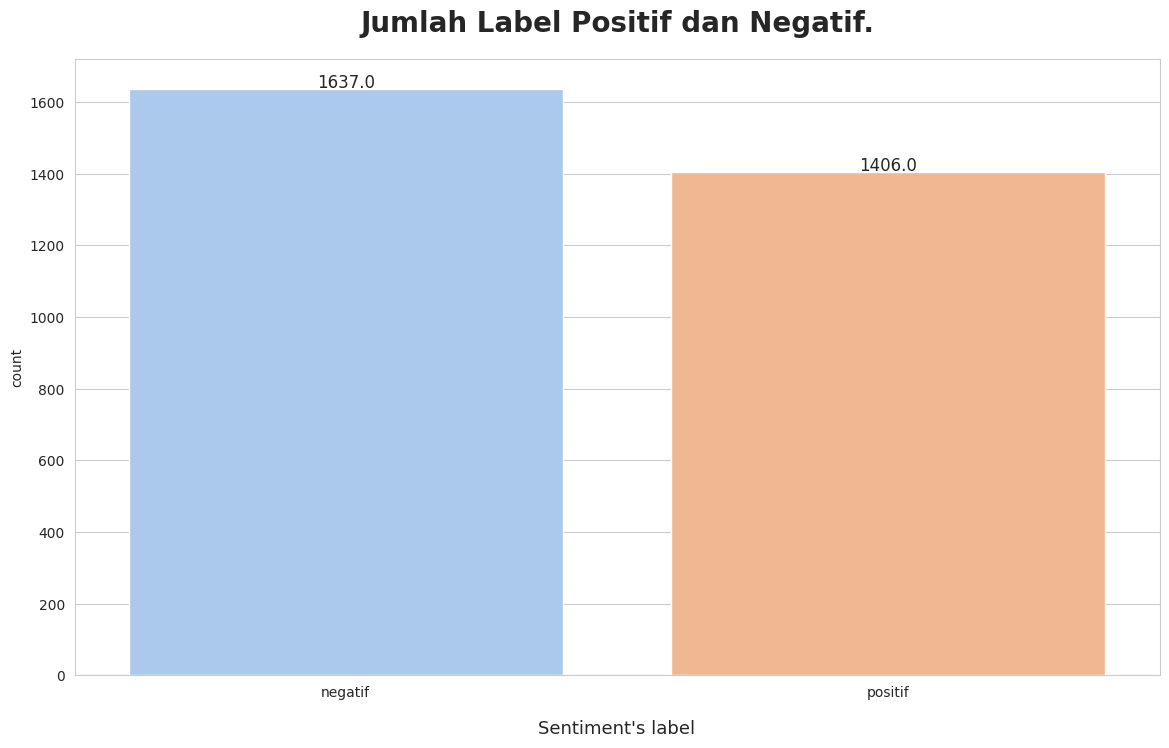

In [ ]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=data, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [ ]:
for index, row in data.iterrows():
    if row['polarity'] == "positif":
        data.at[index, 'polarity'] = 1
    elif row['polarity'] == "negatif":
        data.at[index, 'polarity'] = 2

In [ ]:
data['polarity']

0       2
1       1
2       2
3       2
4       1
       ..
3038    2
3039    1
3040    1
3041    1
3042    1
Name: polarity, Length: 3043, dtype: object

In [ ]:
data.polarity.value_counts()

2    1637
1    1406
Name: polarity, dtype: int64

In [ ]:
print("percentage of sentiment:")
train_pct_pos = data.polarity.value_counts()[1]/data.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = data.polarity.value_counts()[2]/data.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 46.2 %
percentage of negative sentiment: 53.8 %
difference between percentage positive and negative: -7.59 %


Text(0.5, 1.0, 'Distribution of polarity')

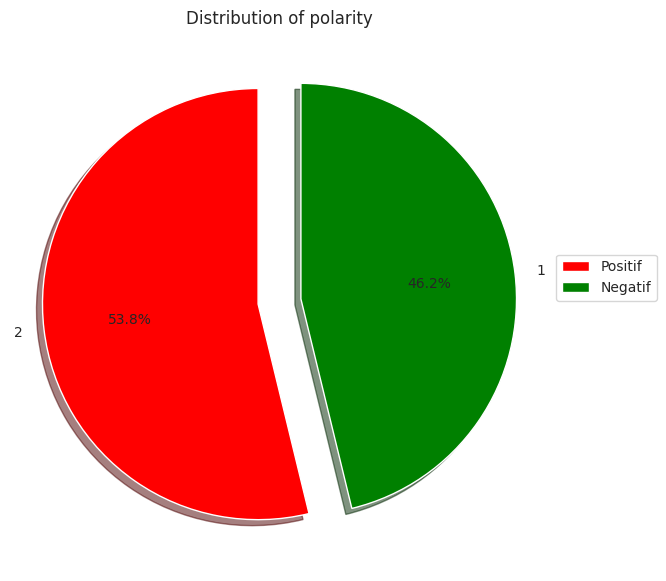

In [ ]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
tags=data['polarity'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, explode=explode, label='')
plt.legend(bbox_to_anchor = (1,0.6),labels=['Positif', 'Negatif'])
plt.title('Distribution of polarity')

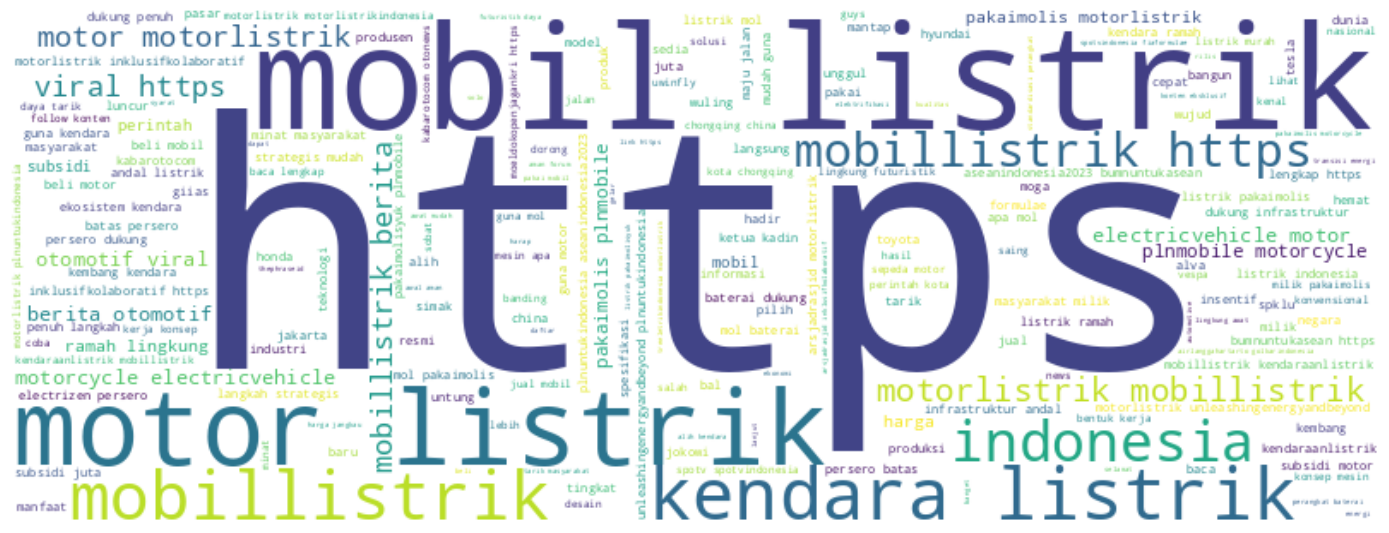

In [ ]:
#ULASAN POSITIF
sentiment_pos = ' '.join([review for review in data['stem_review'][data['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

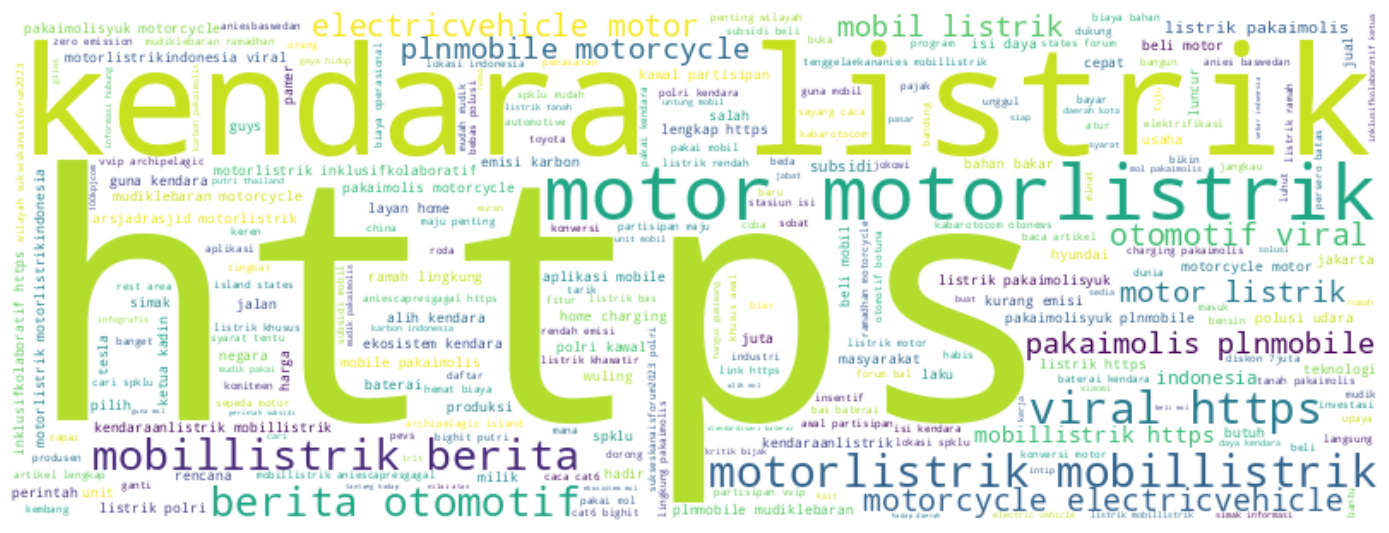

In [ ]:
#ULASAN NEGATIF
sentiment_neg = ' '.join([review for review in data['stem_review'][data['polarity'] == 2]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [ ]:
data.head()

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"[memang, sudah, waktunya, beralih, kendaraan, ...","[beralih, kendaraan, listrik, beli, minyak, ne...",alih kendara listrik beli minyak negara arab,"[alih, kendara, listrik, beli, minyak, negara,...",-1,2
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...,"[spklu, layan, guna, kendara, listrik, sumbar,...",1,1
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"[dengan, beralih, kendaraan, listrik, masyarak...","[beralih, kendaraan, listrik, masyarakat, berk...",alih kendara listrik masyarakat kontribusi kur...,"[alih, kendara, listrik, masyarakat, kontribus...",-2,2
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"[perseroan, terbatas, persero, ajak, masyaraka...","[perseroan, terbatas, persero, ajak, masyaraka...",persero batas persero ajak masyarakat rubah bi...,"[persero, batas, persero, ajak, masyarakat, ru...",-1,2
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...,"[spklu, layan, guna, kendara, listrik, sumbar,...",1,1


In [ ]:
data.to_csv("dataset_kendaraanlistrik_with_sentiment_polarity.csv")

In [ ]:
data.to_excel("dataset_kendaraanlistrik_with_sentiment_polarity2.xlsx")

**PEMBOBOTAN KATA DENGAN TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
data.head()

,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"[memang, sudah, waktunya, beralih, kendaraan, ...","[beralih, kendaraan, listrik, beli, minyak, ne...",alih kendara listrik beli minyak negara arab,"[alih, kendara, listrik, beli, minyak, negara,...",-1,2
1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...,"[spklu, layan, guna, kendara, listrik, sumbar,...",1,1
2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"[dengan, beralih, kendaraan, listrik, masyarak...","[beralih, kendaraan, listrik, masyarakat, berk...",alih kendara listrik masyarakat kontribusi kur...,"[alih, kendara, listrik, masyarakat, kontribus...",-2,2
3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"[perseroan, terbatas, persero, ajak, masyaraka...","[perseroan, terbatas, persero, ajak, masyaraka...",persero batas persero ajak masyarakat rubah bi...,"[persero, batas, persero, ajak, masyarakat, ru...",-1,2
4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"[lima, spklu, siap, layani, pengguna, kendaraa...","[spklu, layani, pengguna, kendaraan, listrik, ...",spklu layan guna kendara listrik sumbar https ...,"[spklu, layan, guna, kendara, listrik, sumbar,...",1,1


In [ ]:
Ulasan = data['stem_review']

In [ ]:
Ulasan.isnull().sum()

0

In [ ]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [ ]:
#menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

8068


In [ ]:
#mengurutkan berdasarkan urutab abjad kata
term_fit.vocabulary_

{'alih': 640,
 'kendara': 3670,
 'listrik': 4128,
 'beli': 1035,
 'minyak': 4532,
 'negara': 4835,
 'arab': 753,
 'spklu': 6610,
 'layan': 4027,
 'guna': 2617,
 'sumbar': 6728,
 'https': 2878,
 'jxusxb5cjf': 3475,
 'masyarakat': 4349,
 'kontribusi': 3850,
 'kurang': 3947,
 'emisi': 2061,
 'karbon': 3568,
 'sedia': 6294,
 'fasilitas': 2204,
 'dukung': 1888,
 'charging': 1441,
 'station': 6646,
 'pada': 5205,
 'jangkau': 3314,
 'plndisjatim': 5519,
 'persero': 5428,
 'batas': 961,
 'ajak': 587,
 'rubah': 6130,
 'biasa': 1129,
 'langsung': 4001,
 'seminar': 6343,
 'nasional': 4819,
 'implementasi': 3032,
 'program': 5683,
 'green': 2582,
 'energy': 2082,
 'publik': 5721,
 'rabu': 5862,
 'unleashingenergyandbeyond': 7365,
 '2rontv26x4': 159,
 'lk0ihetzes': 4149,
 'broker': 1238,
 'jabat': 3271,
 'karyawan': 3582,
 'daerah': 1636,
 'khusus': 3733,
 'ibukota': 2956,
 'plus': 5545,
 'skeptis': 6502,
 'pakai': 5225,
 'bensin': 1061,
 'pltu': 5542,
 'pltn': 5539,
 'bolehdeh': 1205,
 'pikir': 54

In [ ]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 640)	1
  (0, 753)	1
  (0, 1035)	1
  (0, 3670)	1
  (0, 4128)	1
  (0, 4532)	1
  (0, 4835)	1
  (1, 2617)	1
  (1, 2878)	1
  (1, 3475)	1
  (1, 3670)	1
  (1, 4027)	1
  (1, 4128)	1
  (1, 6610)	1
  (1, 6728)	1
  (2, 640)	1
  (2, 1441)	1
  (2, 1888)	1
  (2, 2061)	1
  (2, 2204)	1
  (2, 3314)	1
  (2, 3568)	1
  (2, 3670)	1
  (2, 3850)	1
  (2, 3947)	1
  :	:
  (3041, 4485)	1
  (3041, 4641)	1
  (3041, 4672)	1
  (3041, 4686)	1
  (3041, 4734)	1
  (3041, 5226)	1
  (3041, 5390)	1
  (3041, 5397)	1
  (3041, 5534)	1
  (3041, 6636)	1
  (3041, 6663)	1
  (3041, 7365)	1
  (3042, 683)	1
  (3042, 730)	1
  (3042, 776)	1
  (3042, 962)	1
  (3042, 1277)	1
  (3042, 1888)	1
  (3042, 3111)	1
  (3042, 4128)	1
  (3042, 4641)	1
  (3042, 4686)	1
  (3042, 5226)	1
  (3042, 5534)	1
  (3042, 7365)	1


In [ ]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

spklu layan guna kendara listrik sumbar https jxusxb5cjf


In [ ]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 2617)	1
  (0, 2878)	1
  (0, 3475)	1
  (0, 3670)	1
  (0, 4027)	1
  (0, 4128)	1
  (0, 6610)	1
  (0, 6728)	1


In [ ]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[8.32778054 8.32778054 8.32778054 ... 8.32778054 8.32778054 8.32778054]
  (0, 6728)	0.5741135856244586
  (0, 6610)	0.29159022032210447
  (0, 4128)	0.09162148741209777
  (0, 4027)	0.3343820116502946
  (0, 3670)	0.15474926789673418
  (0, 3475)	0.6034967917223729
  (0, 2878)	0.07943437325053514
  (0, 2617)	0.26588977858419693


In [ ]:
data['stem_review'] = data['stem_review'].fillna("tidak ada komentar")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      3043 non-null   object
 1   full_text       3043 non-null   object
 2   username        3043 non-null   object
 3   Komentar        3043 non-null   object
 4   clean_review    3043 non-null   object
 5   normalization   3043 non-null   object
 6   final_text      3043 non-null   object
 7   token           3043 non-null   object
 8   stop_review     3043 non-null   object
 9   stem_review     3043 non-null   object
 10  prepos_text     3043 non-null   object
 11  polarity_score  3043 non-null   int64 
 12  polarity        3043 non-null   object
dtypes: int64(1), object(12)
memory usage: 309.2+ KB


In [ ]:
#mengganti tipe kolom polarity menjadi int64
data['polarity'] = data['polarity'].astype('int64')

In [ ]:
data.to_csv("Hasil_TF-IDF.csv")

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE # Handling Imbalanced
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

In [ ]:
data = pd.read_csv("/content/Hasil_TF-IDF.csv")
data.head()

,Unnamed: 0,created_at,full_text,username,Komentar,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,0,Sat Oct 14 17:59:10 +0000 2023,@KompasTV Memang sudah waktunya beralih ke Ken...,RoykeLantu,@KompasTV Memang sudah waktunya beralih ke Ken...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih ke kendaraan lis...,memang sudah waktunya beralih kendaraan listr...,"['memang', 'sudah', 'waktunya', 'beralih', 'ke...","['beralih', 'kendaraan', 'listrik', 'beli', 'm...",alih kendara listrik beli minyak negara arab,"['alih', 'kendara', 'listrik', 'beli', 'minyak...",-1,2
1,1,Sat Oct 14 15:36:24 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,ilhamiasnawi,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"['lima', 'spklu', 'siap', 'layani', 'pengguna'...","['spklu', 'layani', 'pengguna', 'kendaraan', '...",spklu layan guna kendara listrik sumbar https ...,"['spklu', 'layan', 'guna', 'kendara', 'listrik...",1,1
2,2,Sat Oct 14 12:57:21 +0000 2023,Dengan beralih ke kendaraan listrik masyarakat...,plndisjatim,Dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih ke kendaraan listrik masyarakat...,dengan beralih kendaraan listrik masyarakat b...,"['dengan', 'beralih', 'kendaraan', 'listrik', ...","['beralih', 'kendaraan', 'listrik', 'masyaraka...",alih kendara listrik masyarakat kontribusi kur...,"['alih', 'kendara', 'listrik', 'masyarakat', '...",-2,2
3,3,Sat Oct 14 12:57:20 +0000 2023,PT PLN (Persero) ajak masyarakat merubah kebia...,plndisjatim,PT PLN (Persero) ajak masyarakat merubah kebia...,pt pln (persero) ajak masyarakat merubah kebia...,perseroan terbatas pln persero ajak masyarakat...,perseroan terbatas persero ajak masyarakat me...,"['perseroan', 'terbatas', 'persero', 'ajak', '...","['perseroan', 'terbatas', 'persero', 'ajak', '...",persero batas persero ajak masyarakat rubah bi...,"['persero', 'batas', 'persero', 'ajak', 'masya...",-1,2
4,4,Sat Oct 14 12:53:03 +0000 2023,PLN: Lima SPKLU siap layani pengguna kendaraan...,antarabiz,PLN: Lima SPKLU siap layani pengguna kendaraan...,pln: lima spklu siap layani pengguna kendaraan...,pln lima spklu siap layani pengguna kendaraan ...,lima spklu siap layani pengguna kendaraan lis...,"['lima', 'spklu', 'siap', 'layani', 'pengguna'...","['spklu', 'layani', 'pengguna', 'kendaraan', '...",spklu layan guna kendara listrik sumbar https ...,"['spklu', 'layan', 'guna', 'kendara', 'listrik...",1,1


In [ ]:
X = data['stem_review']
y = data['polarity']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [ ]:
data['polarity'].shape

(3043,)

In [ ]:
data['stem_review'].shape

(3043,)

In [ ]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

**MENYIAPKAN DATA LATIH DAN DATA UJI**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting Datafrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['final_text'], data['polarity'], test_size=0.1, random_state = 50)

In [ ]:
print(f"Jumlah x train adalah {len(X_train)}")
print(f"Jumlah x test adalah {len(X_test)}")
print(f"Jumlah y train adalah {len(y_train)}")
print(f"Jumlah y tes adalah {len(y_test)}")

Jumlah x train adalah 2738
Jumlah x test adalah 305
Jumlah y train adalah 2738
Jumlah y tes adalah 305


In [ ]:
data_train = data.loc[X_train.index, ['final_text', 'polarity']]
data_train.head()

,final_text,polarity
2689,berikut beberapa keuntungan manfaat yang kam...,1
1211,pemerintah akan mengumumkan besaran insentif m...,1
1507,chrysler tampilkan kokpit mobil listrik masa d...,2
1554,xiaomi patenkan teknologi baterai baru kendara...,2
209,sukseskanaisforum2023 polri menyiapkan sebanya...,2


In [ ]:
#simpan hasil data train
data_train.to_excel('hasildata_train.xlsx', index=False)

In [ ]:
#simpan hasil data test ke csv
data_train.to_csv("hasildata_train.csv")

In [ ]:
data_test = data.loc[X_test.index, ['final_text', 'polarity']]
data_test.head()

,final_text,polarity
2556,kamu punya kendaraan elite tapi bensin sulit ...,1
1627,mobil besutan perusahaan gadget ternyata cuk...,2
1542,jangan gegabah gusmuhaimin pkbno1 mobillistri...,2
786,ribu tiket formula terjual indonesia akan ja...,1
2849,titik lokasi spklu untuk para pengguna kenda...,2


In [ ]:
#simpan hasil data test
data_test.to_excel('hasildata_test.xlsx', index=False)

In [ ]:
#simpan hasil data test ke csv
data_test.to_csv("hasildata_test.csv")

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2738, 9075)
(305, 9075)


In [ ]:
X_train = X_train.toarray()

In [ ]:
X_test = X_test.toarray()

**KLASIFIKASI ALGORITMA**

**NAIVE BAYES CLASSIFIER**

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7344262295081967

In [ ]:
# Menampilkan hasil classification report
print("HASIL classification report Naive Bayes Classifier")
print(classification_report(y_test,nb_prediction))

# Menampilkan hasil akurasi dengan confusion matrix
print("HASIL CONFUSION MATRIX Naive Bayes Classifier")
confusionNB = confusion_matrix(y_test,nb_prediction)
print(confusionNB, "\n")

HASIL classification report Naive Bayes Classifier
              precision    recall  f1-score   support

           1       0.79      0.61      0.69       148
           2       0.70      0.85      0.77       157

    accuracy                           0.73       305
   macro avg       0.75      0.73      0.73       305
weighted avg       0.74      0.73      0.73       305

HASIL CONFUSION MATRIX Naive Bayes Classifier
[[ 91  57]
 [ 24 133]] 



In [ ]:
predict_nb = pd.DataFrame(nb_prediction, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_nb['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_nb['sentimen'] = sentimen

print(predict_nb.predictvalues.value_counts()[1])
print(predict_nb.predictvalues.value_counts()[2])

115
190


In [ ]:
prediction_nb_group = predict_nb.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_nb_group

,predictvalues,sentimen
0,1,115
1,2,190


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = predict_nb.predictvalues.value_counts()[1]/predict_nb.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,1), '%')

sen_neg = predict_nb.predictvalues.value_counts()[2]/predict_nb.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 37.7 %
percentage of negative sentiment: 62.3 %
difference between percentage positive and negative: -24.59 %


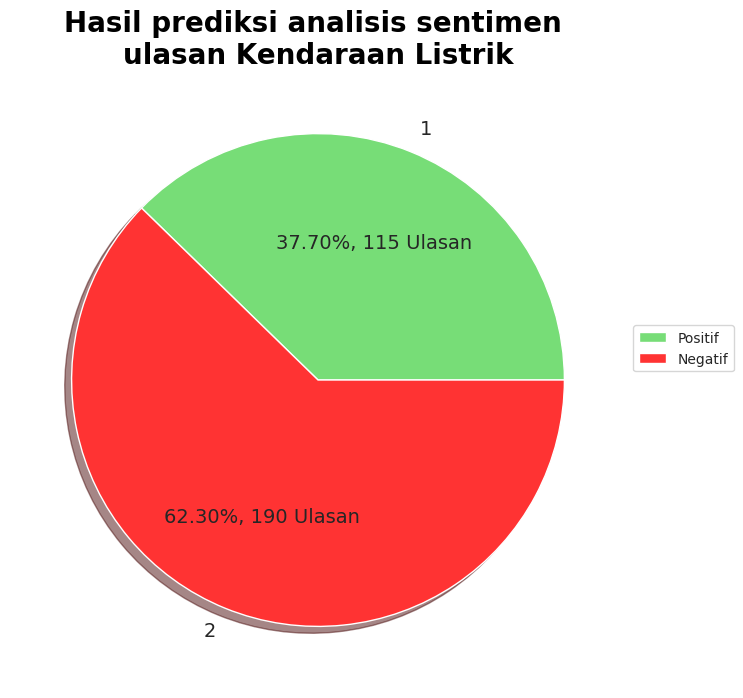

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0)
my_colors = ['#77dd77','#ff3333']
ax.pie(prediction_nb_group.sentimen, labels=prediction_nb_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_nb_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan Kendaraan Listrik', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Positif','Negatif'])

# plt.savefig('Hasilprediksi_lembaga survei.png')
plt.show()

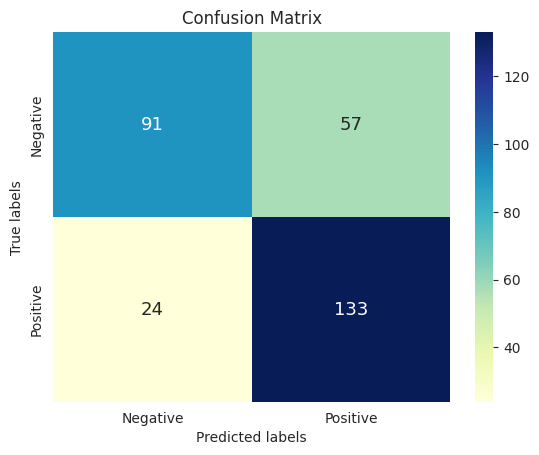

In [ ]:
matrix = confusion_matrix(y_test,nb_prediction)
matrix

ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

akurasi_nb = accuracy_score(y_test,nb_prediction)
print("Accuracy model:", round(akurasi_nb,3))

recall = recall_score(y_test,nb_prediction, average='weighted')
print("Recall model:", round(recall,3))

precision = precision_score(y_test,nb_prediction, average='weighted')
print("Precision model:", round(precision,3))

f1 = f1_score(y_test,nb_prediction, average='weighted')
print("f1 score:", round(f1,3))

Accuracy model: 0.734
Recall model: 0.734
Precision model: 0.744
f1 score: 0.73


**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8295081967213115

In [ ]:
# Menampilkan hasil classification report
print("HASIL classification report SVM")
print(classification_report(y_test,svm_prediction))

# Menampilkan hasil akurasi dengan confusion matrix
print("HASIL CONFUSION MATRIX SVM")
confusionNB = confusion_matrix(y_test,svm_prediction)
print(confusionNB, "\n")

HASIL classification report SVM
              precision    recall  f1-score   support

           1       0.79      0.88      0.83       148
           2       0.87      0.78      0.83       157

    accuracy                           0.83       305
   macro avg       0.83      0.83      0.83       305
weighted avg       0.83      0.83      0.83       305

HASIL CONFUSION MATRIX SVM
[[130  18]
 [ 34 123]] 



In [ ]:
predict_svm = pd.DataFrame(svm_prediction, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_svm['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_svm['sentimen'] = sentimen

print(predict_svm.predictvalues.value_counts()[1])
print(predict_svm.predictvalues.value_counts()[2])

164
141


In [ ]:
prediction_svm_group = predict_svm.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_svm_group

,predictvalues,sentimen
0,1,164
1,2,141


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = predict_svm.predictvalues.value_counts()[1]/predict_svm.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_svm.predictvalues.value_counts()[2]/predict_svm.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 53.77 %
percentage of negative sentiment: 46.23 %
difference between percentage positive and negative: 7.54 %


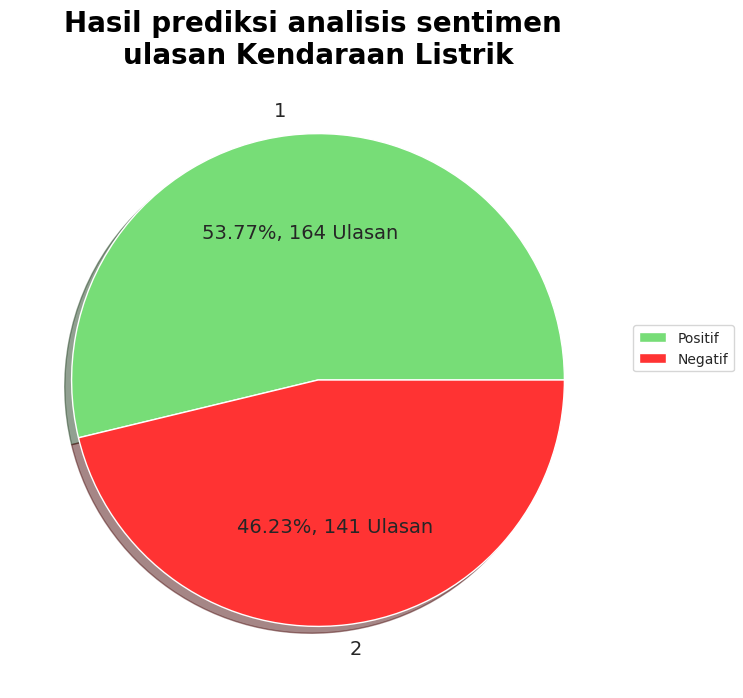

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0)
my_colors = ['#77dd77','#ff3333']
ax.pie(prediction_svm_group.sentimen, labels=prediction_svm_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_svm_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan Kendaraan Listrik', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Positif','Negatif'])

# plt.savefig('Hasilprediksi_kendaraanlistrik.png')
plt.show()

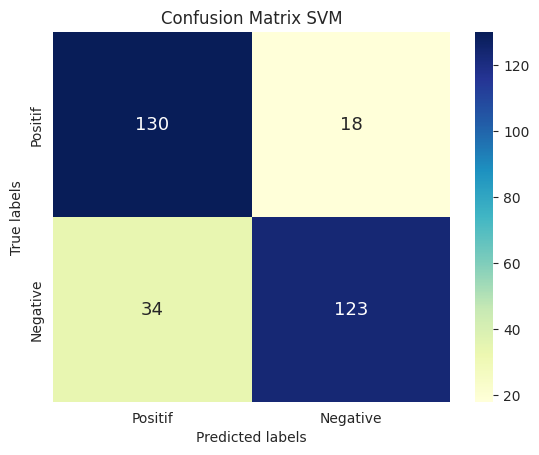

In [ ]:
matrix = confusion_matrix(y_test,svm_prediction)
matrix

ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix SVM')
ax.xaxis.set_ticklabels(['Positif', 'Negative'])
ax.yaxis.set_ticklabels(['Positif', 'Negative'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

akurasi_svm = accuracy_score(y_test,svm_prediction)
print("Accuracy model:", round(akurasi_svm,2))

recall = recall_score(y_test,svm_prediction, average='weighted')
print("Recall model:", round(recall,2))

precision = precision_score(y_test,svm_prediction, average='weighted')
print("Precision model:", round(precision,2))

f1 = f1_score(y_test,svm_prediction, average='weighted')
print("f1 score:", round(f1,2))

Accuracy model: 0.83
Recall model: 0.83
Precision model: 0.83
f1 score: 0.83
